In [ ]:
!pip install kaggle

In [7]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
! cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d mariaherrerot/aptos2019

100% 8.01G/8.01G [01:30<00:00, 98.9MB/s]
100% 8.01G/8.01G [01:30<00:00, 94.7MB/s]


In [ ]:
!unzip /content/aptos2019.zip -d /content/data

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from random import randrange

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/data"))

# Any results you write to the current directory are saved as output.

import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns


['train_1.csv', 'test.csv', 'valid.csv', 'val_images', 'test_images', 'train_images']


In [16]:
! pip install albumentations

In [17]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose, PadIfNeeded
)

In [19]:
# load csv files with labels as pandas dataframes
train = pd.read_csv('/content/data/train_1.csv')
test = pd.read_csv('/content/data/test.csv')

In [20]:
# find out the number of images in test ans train sets
print('Number of images in training set is {}'.format(len(train)))
print('Number of images in test set is {}'.format(len(test)))

Number of images in training set is 2930
Number of images in test set is 366


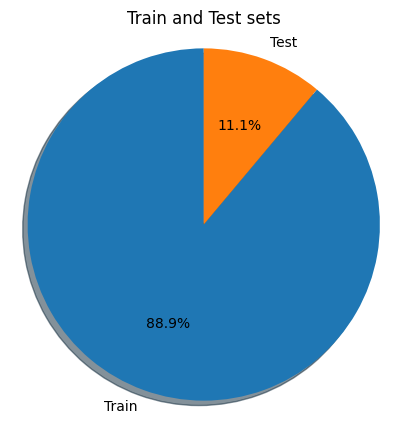

In [21]:

# Plot pie chart
labels = 'Train', 'Test'
sizes = len(train), len(test)

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Train and Test sets')
plt.show()

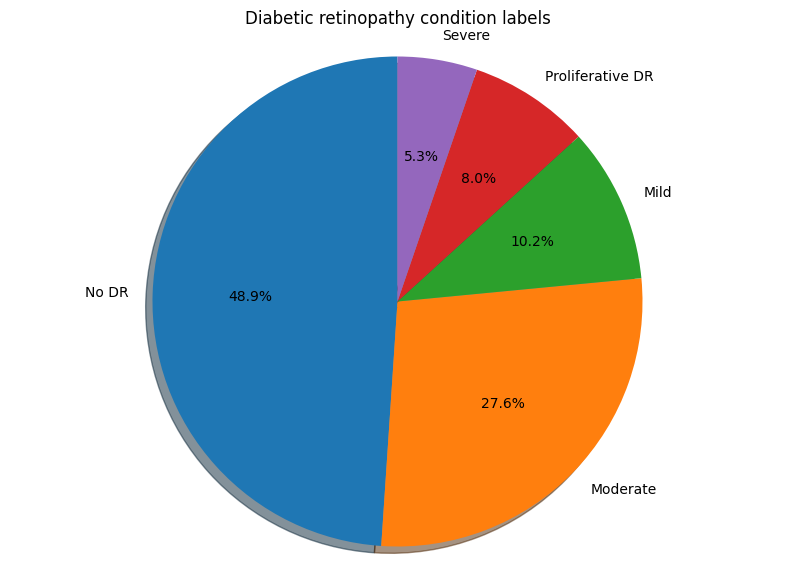

In [22]:
# Plot pie chart
labels = 'No DR', 'Moderate', 'Mild', 'Proliferative DR', 'Severe'
sizes = train.diagnosis.value_counts()

fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Diabetic retinopathy condition labels')
plt.show()


In [31]:
# define paths to train and test images
TRAIN_IMG_PATH = "/content/data/train_images/train_images"
TEST_IMG_PATH = "/content/data/test_images/test_images"

# function to plot a grid of images
def view_fundus_images(images, title = ''):
    """
    Function to plot grid with several examples of fundus images.
    INPUT:
        train - array with filenames for images and condition labels

    OUTPUT: None
    """
    width = 5
    height = 2
    fig, axs = plt.subplots(height, width, figsize=(15,5))

    for im in range(0, height * width):
        # open image
        image = Image.open(os.path.join(TRAIN_IMG_PATH,images[im] + '.png'))
        i = im // width
        j = im % width
        axs[i,j].imshow(image) #plot the data
        axs[i,j].axis('off')

    # set suptitle
    plt.suptitle(title)
    plt.show()

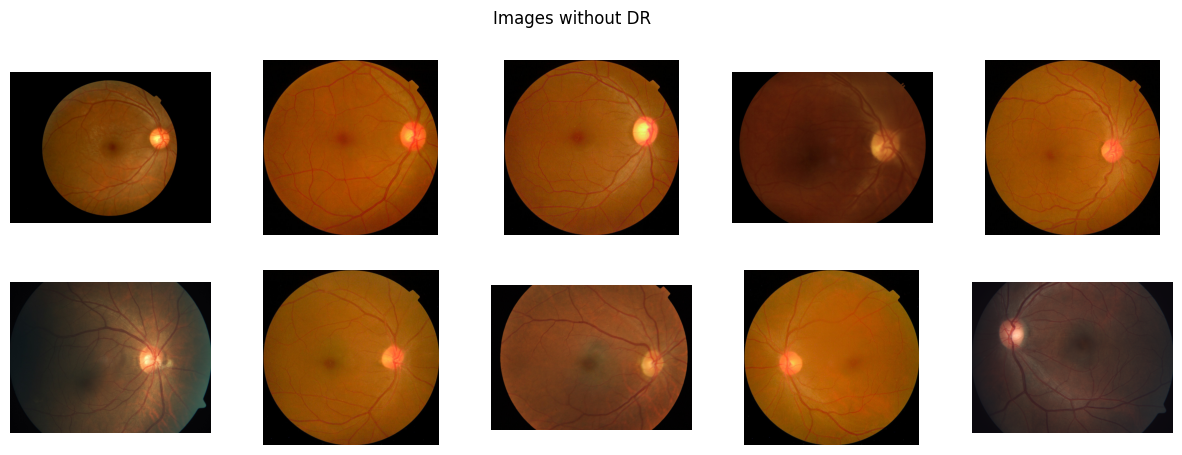

In [32]:
view_fundus_images(train[train['diagnosis'] == 0][:10].id_code.values, title = 'Images without DR')

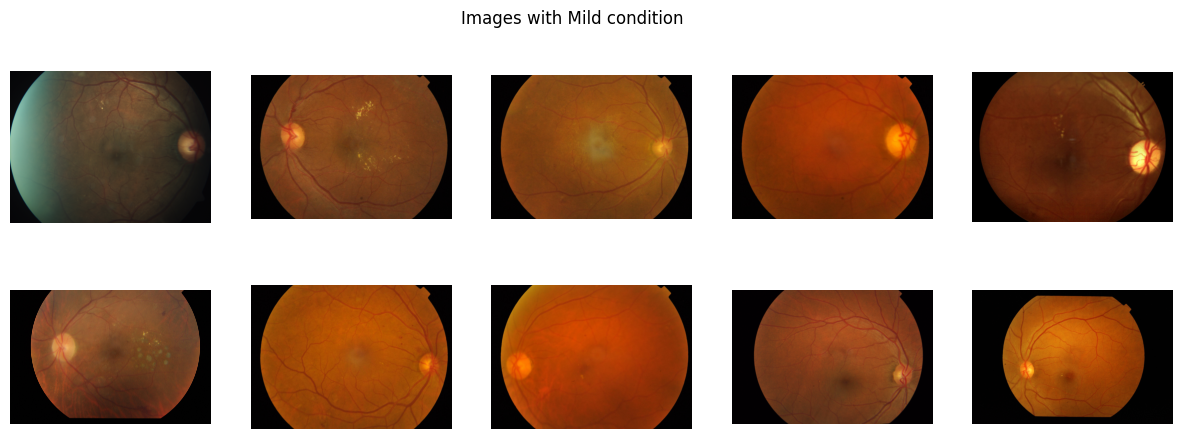

In [33]:
view_fundus_images(train[train['diagnosis'] == 1][:10].id_code.values, title = 'Images with Mild condition')

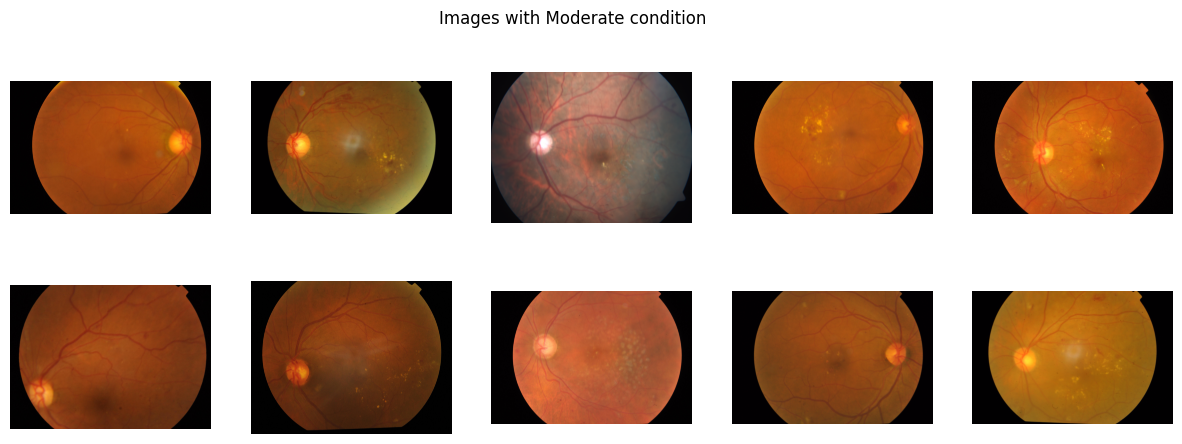

In [34]:
view_fundus_images(train[train['diagnosis'] == 2][:10].id_code.values, title = 'Images with Moderate condition')

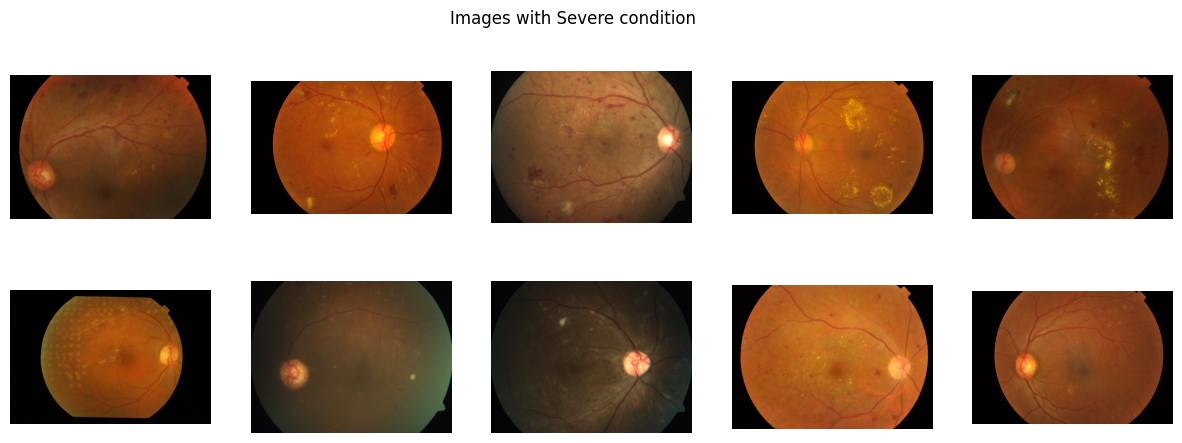

In [35]:
view_fundus_images(train[train['diagnosis'] == 3][:10].id_code.values, title = 'Images with Severe condition')

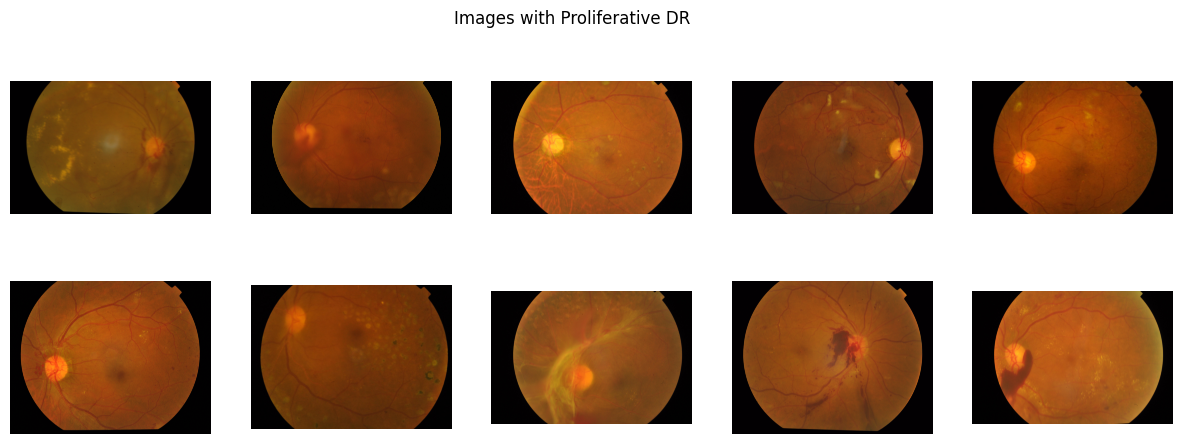

In [36]:
view_fundus_images(train[train['diagnosis'] == 4][:10].id_code.values, title = 'Images with Proliferative DR')

In [37]:
def get_image_sizes(df, train = True):
    '''
    Function to get sizes of images from test and train sets.
    INPUT:
        df - dataframe containing image filenames
        train - indicates whether we are getting sizes of images from train or test set
    '''
    if train:
        path = TRAIN_IMG_PATH
    else:
        path = TEST_IMG_PATH

    widths = []
    heights = []

    images = df.id_code

    max_im = Image.open(os.path.join(path, images[0] + '.png'))
    min_im = Image.open(os.path.join(path, images[0] + '.png'))

    for im in range(0, len(images)):
        image = Image.open(os.path.join(path, images[im] + '.png'))
        width, height = image.size

        if len(widths) > 0:
            if width > max(widths):
                max_im = image

            if width < min(widths):
                min_im = image

        widths.append(width)
        heights.append(height)

    return widths, heights, max_im, min_im

In [38]:
# get sizes of images from test and train sets
train_widths, train_heights, max_train, min_train = get_image_sizes(train, train = True)
test_widths, test_heights, max_test, min_test = get_image_sizes(test, train = False)

In [39]:
print('Maximum width for training set is {}'.format(max(train_widths)))
print('Minimum width for training set is {}'.format(min(train_widths)))
print('Maximum height for training set is {}'.format(max(train_heights)))
print('Minimum height for training set is {}'.format(min(train_heights)))

Maximum width for training set is 4288
Minimum width for training set is 474
Maximum height for training set is 2848
Minimum height for training set is 358


In [40]:
print('Maximum width for test set is {}'.format(max(test_widths)))
print('Minimum width for test set is {}'.format(min(test_widths)))
print('Maximum height for test set is {}'.format(max(test_heights)))
print('Minimum height for test set is {}'.format(min(test_heights)))

Maximum width for test set is 4288
Minimum width for test set is 640
Maximum height for test set is 2848
Minimum height for test set is 480


<ipython-input-41-c1dcda4b54ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_widths, kde=False, label='Train Width')
<ipython-input-41-c1dcda4b54ad>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_heights, kde=False, label='Train Height')


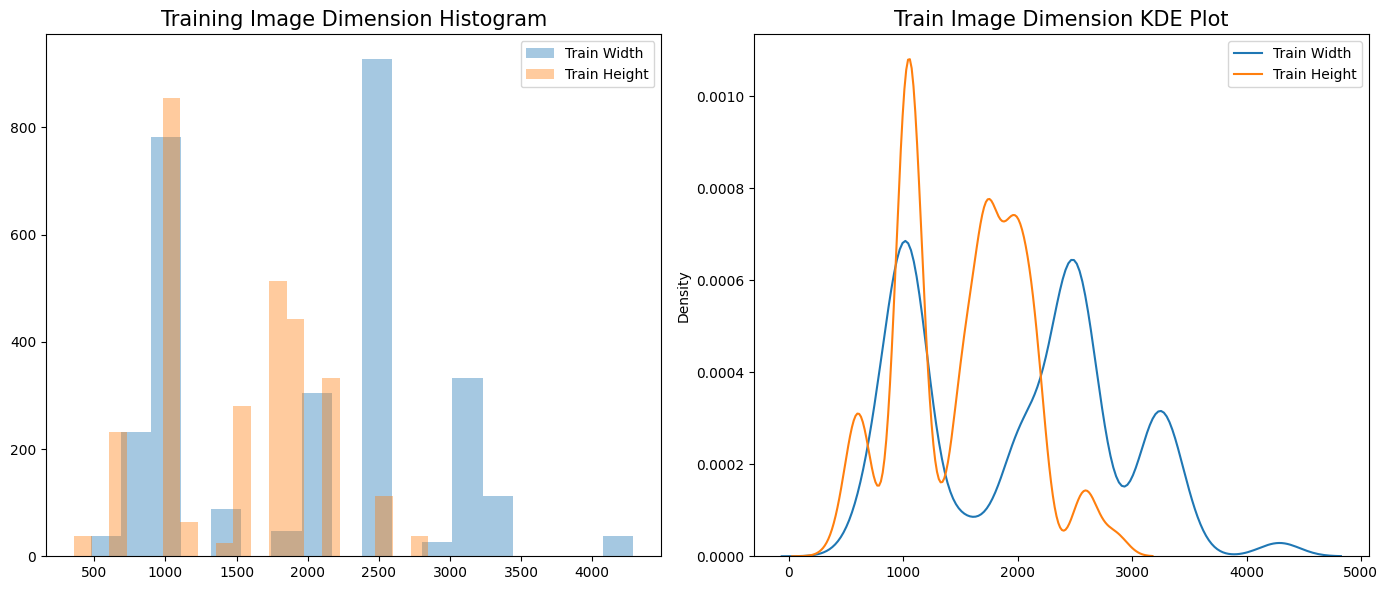

In [41]:

# Plot Histograms and KDE plots for images from the training set
# Source: https://www.kaggle.com/chewzy/eda-weird-images-with-new-updates
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(train_widths, kde=False, label='Train Width')
sns.distplot(train_heights, kde=False, label='Train Height')
plt.legend()
plt.title('Training Image Dimension Histogram', fontsize=15)

plt.subplot(122)
sns.kdeplot(train_widths, label='Train Width')
sns.kdeplot(train_heights, label='Train Height')
plt.legend()
plt.title('Train Image Dimension KDE Plot', fontsize=15)

plt.tight_layout()
plt.show()

<ipython-input-42-01dd23277176>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_widths, kde=False, label='Test Width')
<ipython-input-42-01dd23277176>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_heights, kde=False, label='Test Height')


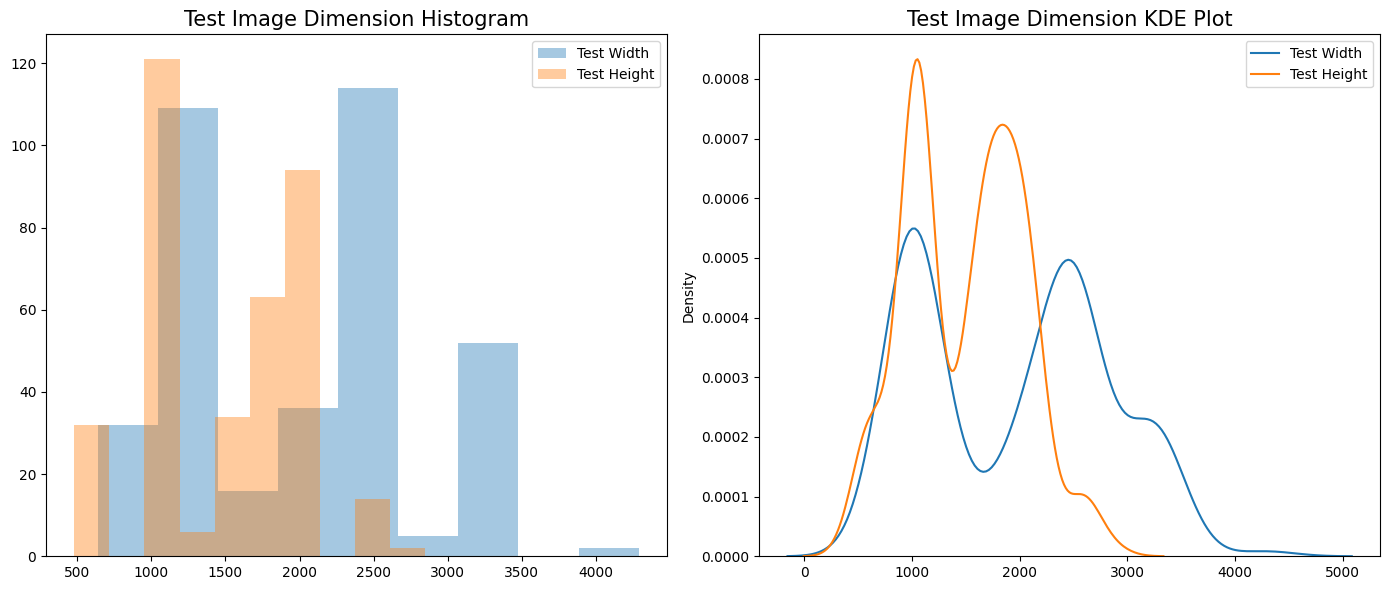

In [42]:
# Plot Histograms and KDE plots for images from the test set
# Source: https://www.kaggle.com/chewzy/eda-weird-images-with-new-updates
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(test_widths, kde=False, label='Test Width')
sns.distplot(test_heights, kde=False, label='Test Height')
plt.legend()
plt.title('Test Image Dimension Histogram', fontsize=15)

plt.subplot(122)
sns.kdeplot(test_widths, label='Test Width')
sns.kdeplot(test_heights, label='Test Height')
plt.legend()
plt.title('Test Image Dimension KDE Plot', fontsize=15)

plt.tight_layout()
plt.show()

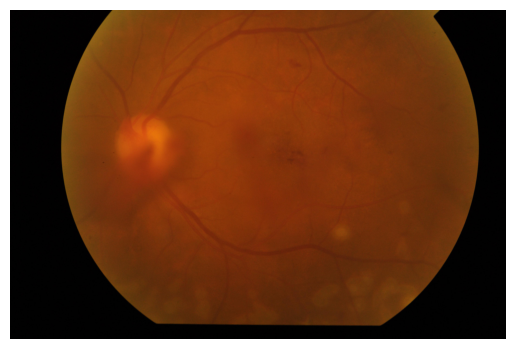

In [43]:
plt.axis('off')
plt.imshow(max_train) #plot the data

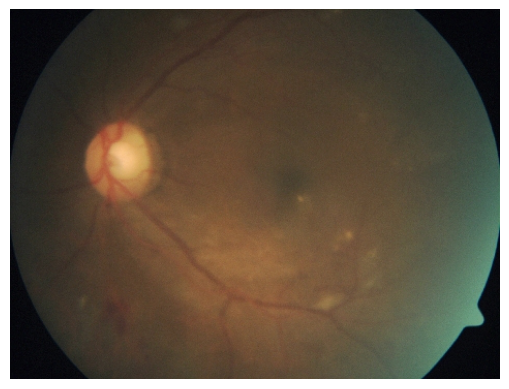

In [44]:
plt.axis('off')
plt.imshow(min_train) #plot the data

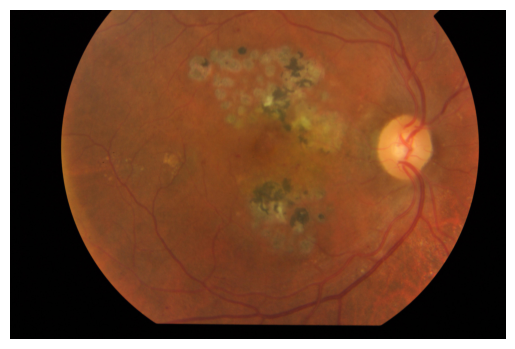

In [45]:
plt.axis('off')
plt.imshow(max_test) #plot the data

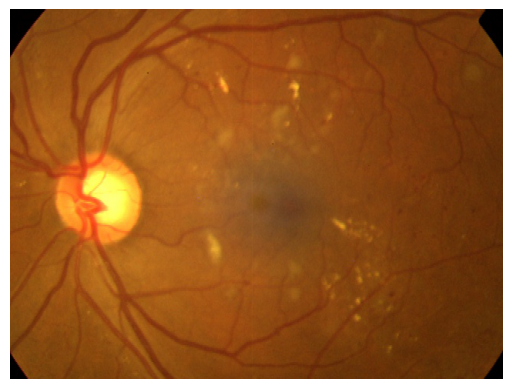

In [46]:
plt.axis('off')
plt.imshow(min_test) #plot the data

In [47]:
# define the dictionary for labels
diagnosis_dict = {
    0:'No DR',
    1:'Mild',
    2:'Moderate',
    3: 'Severe',
    4: 'Proliferative DR'
}

In [48]:
# function to plot a grid of images
def view_fundus_images_labels(train, rand_indices, aug = None, title = ''):
    """
    Function to plot grid with several examples of fundus images.
    INPUT:
        train - array with filenames for images and condition labels
        rand_indices - indices of images to plot
        title - plot title

    OUTPUT: None
    """
    width = 5
    height = 2
    counter = 0
    fig, axs = plt.subplots(height, width, figsize=(15,5))

    for im in rand_indices:
        # open image
        image = Image.open(os.path.join(TRAIN_IMG_PATH, train.iloc[im].id_code + '.png'))

        if aug is not None:
            image = aug(image=np.array(image))['image']

        i = counter // width
        j = counter % width
        axs[i,j].imshow(image) #plot the data
        axs[i,j].axis('off')

        diagnosis = train[train['id_code'] == train.iloc[im].id_code].diagnosis.values[0]

        axs[i,j].set_title(diagnosis_dict[diagnosis])
        counter += 1

    # set suptitle
    plt.suptitle(title)
    plt.show()

In [49]:
# get some random image indices from the training set
rand_indices = [randrange(len(train)) for x in range(0,10)]
rand_indices

[281, 2149, 2315, 2797, 483, 1093, 252, 2913, 1591, 1972]

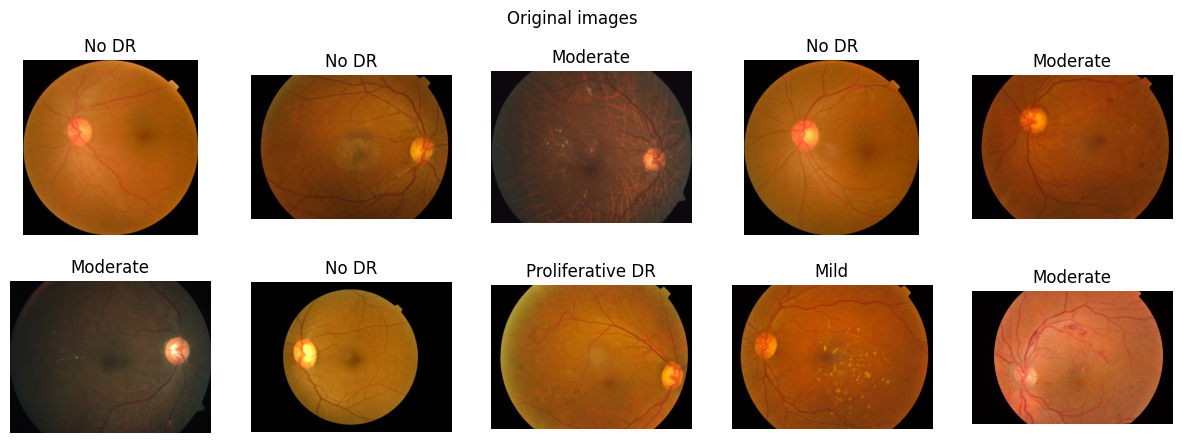

In [50]:
# plot original images
view_fundus_images_labels(train, rand_indices, title = 'Original images')

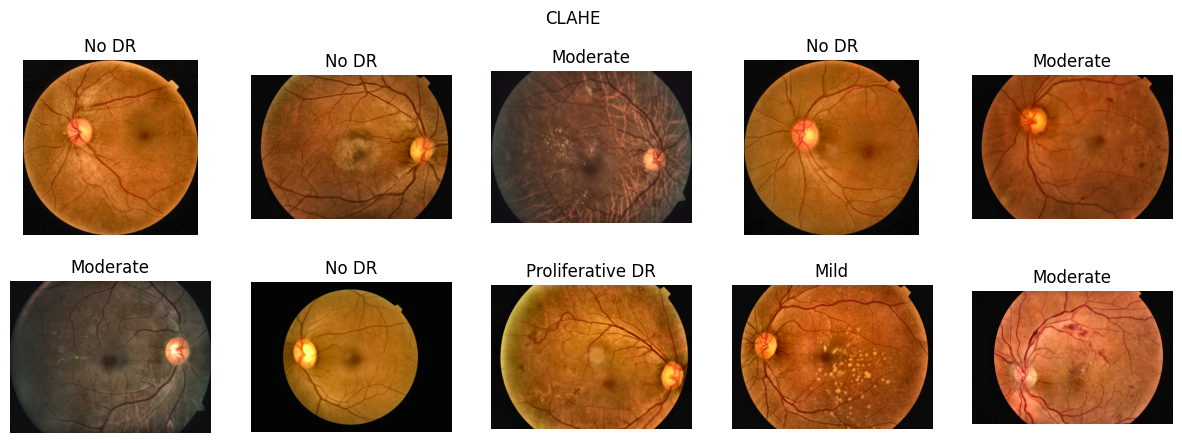

In [51]:
aug = CLAHE(p=1)
view_fundus_images_labels(train, rand_indices, aug, title = 'CLAHE')

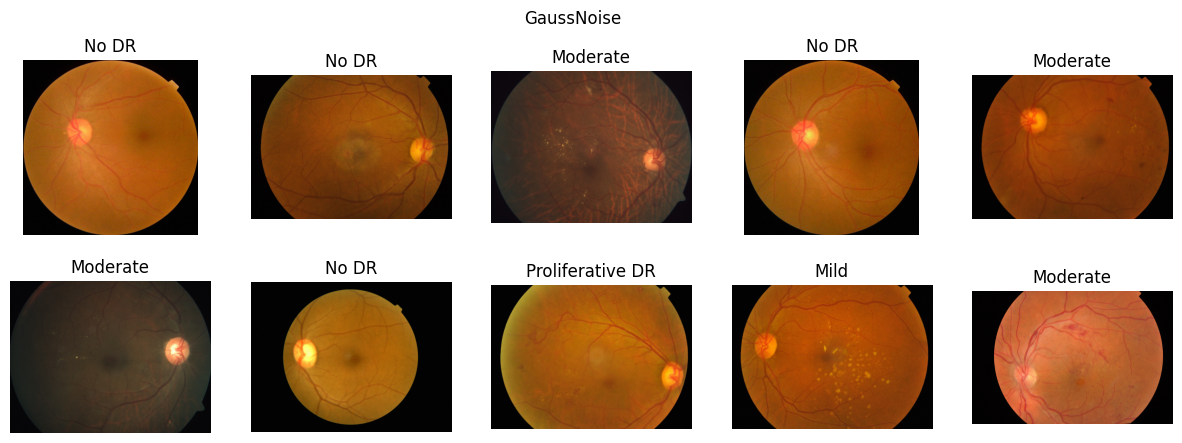

In [52]:
aug = GaussNoise(p=1)
view_fundus_images_labels(train, rand_indices, aug, title = 'GaussNoise')

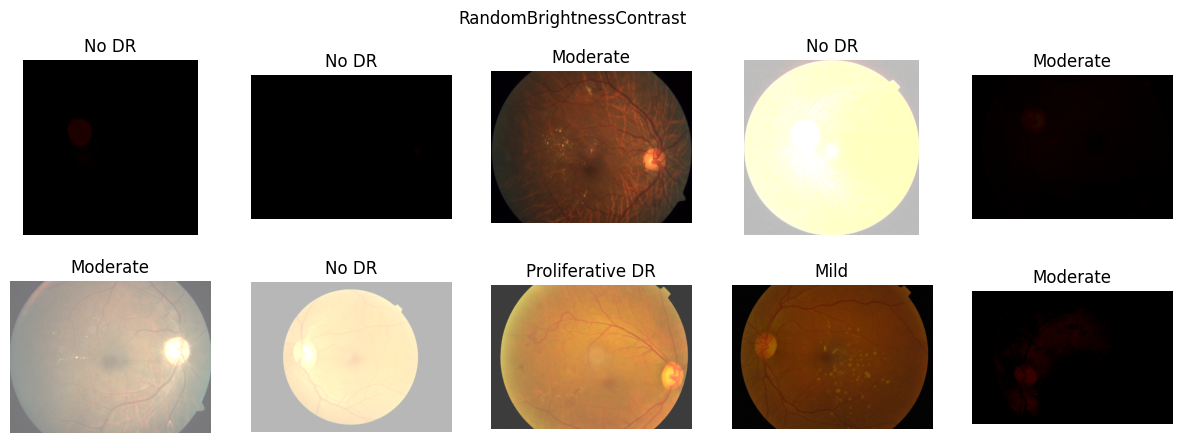

In [53]:
aug = RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p = 1)
view_fundus_images_labels(train, rand_indices, aug, title = 'RandomBrightnessContrast')

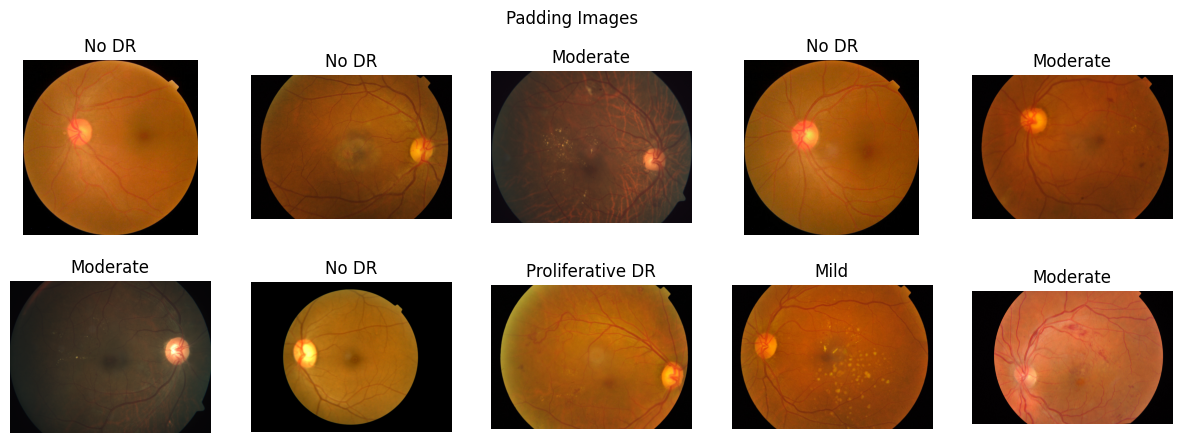

In [54]:
aug = PadIfNeeded(min_height=1024, min_width=1024, p = 1)
view_fundus_images_labels(train, rand_indices, aug, title = 'Padding Images')